In [25]:
from google.colab import drive
drive.mount('/content/drive')

import os
PROJECT_DIR = "/content/drive/MyDrive/cancer-type-classification"
DATA_DIR    = f"{PROJECT_DIR}/data"
RESULTS_DIR = f"{PROJECT_DIR}/results"
MODELS_DIR  = f"{PROJECT_DIR}/models"

os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

print("DATA_DIR:", DATA_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DATA_DIR: /content/drive/MyDrive/cancer-type-classification/data


In [26]:
from google.colab import files
uploaded = files.upload()   # choose data.csv and labels.csv from your Downloads
print(uploaded.keys())

Saving labels.csv to labels.csv
Saving data.csv to data.csv
dict_keys(['labels.csv', 'data.csv'])


In [27]:
import shutil, os

LOCAL_DATA = "/content"

for fname in ["data.csv", "labels.csv"]:
    src = os.path.join(LOCAL_DATA, fname)
    dst = os.path.join(DATA_DIR, fname)
    if os.path.exists(src):
        shutil.move(src, dst)
        print("Moved", src, "->", dst)
    else:
        print("Not found:", src)


Moved /content/data.csv -> /content/drive/MyDrive/cancer-type-classification/data/data.csv
Moved /content/labels.csv -> /content/drive/MyDrive/cancer-type-classification/data/labels.csv


In [34]:
import pandas as pd
import os

data_path   = os.path.join(DATA_DIR, "data.csv")
labels_path = os.path.join(DATA_DIR, "labels.csv")

# 1) Load expression matrix exactly as in UCI description: 801–802 rows × 20531 cols
# DO NOT transpose here.
X = pd.read_csv(data_path, header=None)
print("Raw X shape:", X.shape)

# If you see (20532, 0) it means wrong separator.
# UCI files are comma‑separated; ensure sep=",".
if X.shape[1] == 1:
    X = pd.read_csv(data_path, header=None, sep=",")
    print("Reloaded X with explicit comma sep, shape:", X.shape)

# 2) Load labels
y_df = pd.read_csv(labels_path, header=None)
print("y_df shape:", y_df.shape)
print(y_df.head())

# Column 0 = sample ID, column 1 = class label
y_df.columns = ["sample_id", "Class"]
y_raw = y_df["Class"]
print("Unique classes:", y_raw.unique())

# 3) Check that X and y have same number of rows
print("Final X shape:", X.shape)   # should be (802, 20531)
print("y_raw shape:", y_raw.shape) # (802,)


/tmp/ipython-input-357822401.py:9: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

Raw X shape: (802, 20532)
y_df shape: (802, 2)
          0      1
0       NaN  Class
1  sample_0   PRAD
2  sample_1   LUAD
3  sample_2   PRAD
4  sample_3   PRAD
Unique classes: ['Class' 'PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
Final X shape: (802, 20532)
y_raw shape: (802,)


In [40]:
import pandas as pd
import numpy as np
import os

data_path   = os.path.join(DATA_DIR, "data.csv")
labels_path = os.path.join(DATA_DIR, "labels.csv")

# Load expression with header row, then drop that header row
X_raw = pd.read_csv(data_path, header=None)
print("Raw X shape:", X_raw.shape)
print("First 3 rows of X_raw:\n", X_raw.head(3))

# Row 0 = header with 'sample', 'gene_0', 'gene_1', ...
X_no_header = X_raw.iloc[1:].reset_index(drop=True)
print("X_no_header shape:", X_no_header.shape)


/tmp/ipython-input-4062756763.py:9: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

Raw X shape: (802, 20532)
First 3 rows of X_raw:
       0       1               2              3              4      \
0       NaN  gene_0          gene_1         gene_2         gene_3   
1  sample_0     0.0   2.01720929003  3.26552691165  5.47848651208   
2  sample_1     0.0  0.592732094867  1.58842082049  7.58615673813   

           5       6              7               8       9      ...  \
0         gene_4  gene_5         gene_6          gene_7  gene_8  ...   
1  10.4319989607     0.0  7.17517526213  0.591870870063     0.0  ...   
2  9.62301085621     0.0  6.81604924768             0.0     0.0  ...   

           20522          20523          20524          20525          20526  \
0     gene_20521     gene_20522     gene_20523     gene_20524     gene_20525   
1   4.9267110991  8.21025734657  9.72351589977  7.22003000722  9.11981265388   
2  4.59337169997    7.323865415  9.74093093236  6.25658612273  8.38161216428   

           20527          20528          20529          20530  

In [41]:
# Load labels
y_df = pd.read_csv(labels_path, header=None)
print("Raw y_df head:\n", y_df.head())

y_df.columns = ["sample_id", "Class_raw"]
y_df = y_df.iloc[1:].reset_index(drop=True)   # drop header row

y_raw = y_df["Class_raw"]
print("Unique classes:", y_raw.unique())
print("y_raw shape:", y_raw.shape)

# Drop sample_id column from X_no_header (first column)
X_sub = X_no_header.drop(columns=[0])

# Now all columns should be numeric expression values
X = X_sub.astype(float)
y = y_raw.values

print("Final X shape:", X.shape)
print("Final y shape:", y.shape)
print("Unique classes in y:", np.unique(y))


Raw y_df head:
           0      1
0       NaN  Class
1  sample_0   PRAD
2  sample_1   LUAD
3  sample_2   PRAD
4  sample_3   PRAD
Unique classes: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
y_raw shape: (801,)
Final X shape: (801, 20531)
Final y shape: (801,)
Unique classes in y: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


In [43]:
import numpy as np

class_names = np.unique(y)
print("Class names:", class_names)

name_to_id = {name: i for i, name in enumerate(class_names)}
id_to_name = {i: name for name, i in name_to_id.items()}
print("Mapping:", name_to_id)

y_int = np.array([name_to_id[label] for label in y])

print("y_int unique:", np.unique(y_int))
print("y_int shape:", y_int.shape)


Class names: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']
Mapping: {'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}
y_int unique: [0 1 2 3 4]
y_int shape: (801,)


Train: (640, 20531) Test: (161, 20531)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [    5    23  4370  4371  4808  4809  4814  4815  4816  4817  4819  4831
  5288  7661  7662  7663  7664  7665  8121  9304  9306  9309  9314  9316
  9320  9452  9744 10121 11958 12490 13991 14158 14159 14161 15138 15140
 15141 15446 16566 16568 16569 16571 16574 16575 16576 16578 16579 16604
 16634 16637 16677 16697 16698 16699 16700 16701 16702 16704 16705 16706
 16707 16708 16709 16710 16711 16712 16713 16714 16715 16716 16717 16718
 16719 16720 16721 16722 16723 16724 16725 16726 16727 16728 16729 16730
 16731 16732 16733 16734 16735 16736 16737 16738 16739 16740 16741 16742
 16743 16744 16745 16746 16748 16749 16750 16751 16752 16753 16754 16756
 16757 16758 16759 16760 16761 16762 16763 16764 16765 16766 16767 16768
 16769 16770 16771 16772 16774 16775 16776 16777 16778 16779 16780 16781
 16782 16783 16785 16787 16788 16789 16790 16791 16792 16794 16795 16796
 16798

Selected features: 1000

=== Training LogReg ===
LogReg accuracy: 0.9938
              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



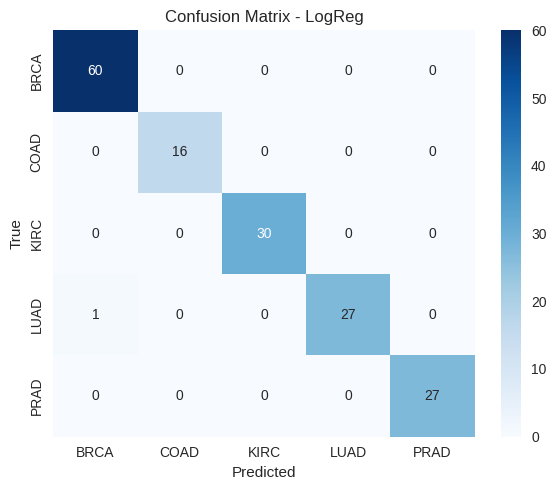


=== Training SVM_linear ===
SVM_linear accuracy: 0.9938
              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



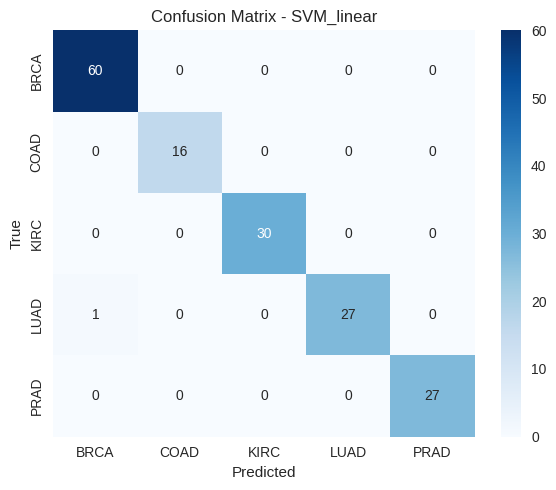


=== Training SVM_rbf ===
SVM_rbf accuracy: 0.9938
              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



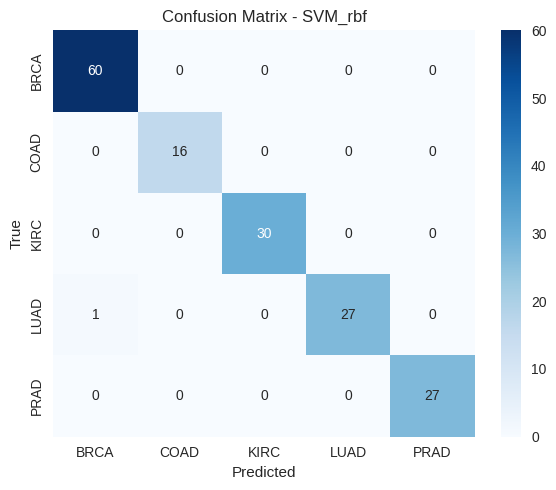


=== Training RandomForest ===
RandomForest accuracy: 0.9876
              precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.93      0.96        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



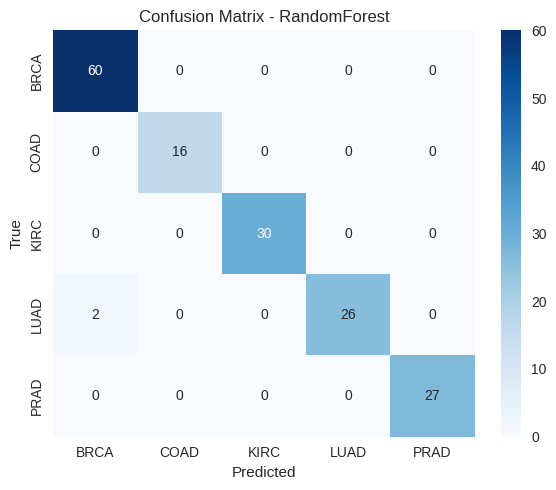


=== Training XGBoost ===
XGBoost accuracy: 0.9938
              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



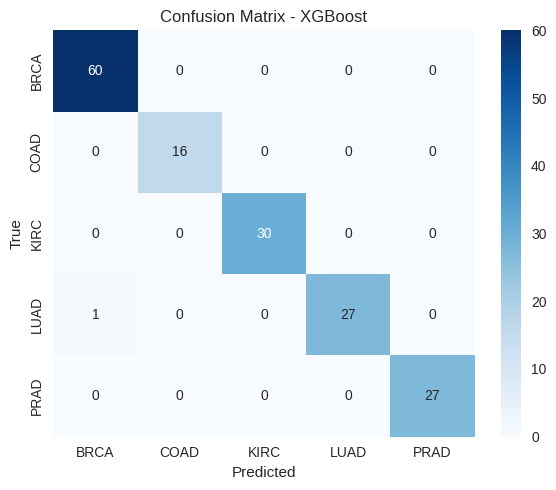


Model performance:
           model  accuracy
0        LogReg  0.993789
1    SVM_linear  0.993789
2       SVM_rbf  0.993789
4       XGBoost  0.993789
3  RandomForest  0.987578


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

plt.style.use("seaborn-v0_8")

# 1) Train / test split (note: y_int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_int,
    test_size=0.2,
    random_state=42,
    stratify=y_int
)

print("Train:", X_train.shape, "Test:", X_test.shape)

# 2) Feature selection
K = 1000 if X_train.shape[1] > 1000 else X_train.shape[1]
selector = SelectKBest(score_func=f_classif, k=K)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs  = selector.transform(X_test)

print("Selected features:", X_train_fs.shape[1])

# 3) Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fs)
X_test_scaled  = scaler.transform(X_test_fs)

# 4) Models
models = {
    "LogReg": LogisticRegression(max_iter=500, n_jobs=-1),
    "SVM_linear": SVC(kernel="linear", probability=True),
    "SVM_rbf": SVC(kernel="rbf", probability=True),
    "RandomForest": RandomForestClassifier(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multi:softprob",
        eval_metric="mlogloss",
        random_state=42,
        n_jobs=-1,
    ),
}

metrics_list = []
classes_ids = np.unique(y_test)

for name, clf in models.items():
    print("\n=== Training", name, "===")
    clf.fit(X_train_scaled, y_train)
    y_pred_id = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_id)
    print(f"{name} accuracy: {acc:.4f}")

    # Convert IDs back to names for report
    y_test_name = np.array([id_to_name[i] for i in y_test])
    y_pred_name = np.array([id_to_name[i] for i in y_pred_id])

    print(classification_report(y_test_name, y_pred_name, target_names=class_names))

    metrics_list.append({"model": name, "accuracy": acc})

    cm = confusion_matrix(y_test_name, y_pred_name, labels=class_names)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

metrics_df = pd.DataFrame(metrics_list).sort_values("accuracy", ascending=False)
print("\nModel performance:\n", metrics_df)


In [45]:
y_train_pred = clf.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"{name} train acc: {train_acc:.4f}, test acc: {acc:.4f}")

XGBoost train acc: 1.0000, test acc: 0.9938


In [46]:
from sklearn.model_selection import cross_val_score

for name, clf in models.items():
    scores = cross_val_score(
        clf,
        scaler.fit_transform(selector.fit_transform(X, y_int)),
        y_int,
        cv=5,
        scoring="accuracy"
    )
    print(name, "CV accuracy:", scores.mean(), "+/-", scores.std())


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [    5    23  4370  4808  4809  4814  4816  4817  4831  5288  7661  7662
  7663  7664  7665  8121  9304  9306  9314  9316  9320  9452 10121 11958
 13991 14158 14159 14161 15138 15140 15141 15446 16566 16568 16569 16571
 16575 16578 16579 16604 16634 16637 16677 16697 16698 16699 16700 16701
 16702 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713 16714
 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725 16726
 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737 16738
 16739 16740 16741 16742 16743 16744 16745 16746 16748 16749 16750 16751
 16752 16753 16754 16756 16757 16758 16759 16760 16761 16762 16763 16764
 16765 16766 16767 16768 16769 16770 16771 16772 16774 16775 16776 16777
 16778 16779 16780 16781 16782 16783 16785 16787 16788 16789 16790 16791
 16792 16794 16795 16796 16798 16799 16800 16801 16802 16803 16804 16805
 16806

LogReg CV accuracy: 0.9987577639751553 +/- 0.0024844720496894454


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [    5    23  4370  4808  4809  4814  4816  4817  4831  5288  7661  7662
  7663  7664  7665  8121  9304  9306  9314  9316  9320  9452 10121 11958
 13991 14158 14159 14161 15138 15140 15141 15446 16566 16568 16569 16571
 16575 16578 16579 16604 16634 16637 16677 16697 16698 16699 16700 16701
 16702 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713 16714
 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725 16726
 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737 16738
 16739 16740 16741 16742 16743 16744 16745 16746 16748 16749 16750 16751
 16752 16753 16754 16756 16757 16758 16759 16760 16761 16762 16763 16764
 16765 16766 16767 16768 16769 16770 16771 16772 16774 16775 16776 16777
 16778 16779 16780 16781 16782 16783 16785 16787 16788 16789 16790 16791
 16792 16794 16795 16796 16798 16799 16800 16801 16802 16803 16804 16805
 16806

SVM_linear CV accuracy: 0.9987577639751553 +/- 0.0024844720496894454


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [    5    23  4370  4808  4809  4814  4816  4817  4831  5288  7661  7662
  7663  7664  7665  8121  9304  9306  9314  9316  9320  9452 10121 11958
 13991 14158 14159 14161 15138 15140 15141 15446 16566 16568 16569 16571
 16575 16578 16579 16604 16634 16637 16677 16697 16698 16699 16700 16701
 16702 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713 16714
 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725 16726
 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737 16738
 16739 16740 16741 16742 16743 16744 16745 16746 16748 16749 16750 16751
 16752 16753 16754 16756 16757 16758 16759 16760 16761 16762 16763 16764
 16765 16766 16767 16768 16769 16770 16771 16772 16774 16775 16776 16777
 16778 16779 16780 16781 16782 16783 16785 16787 16788 16789 16790 16791
 16792 16794 16795 16796 16798 16799 16800 16801 16802 16803 16804 16805
 16806

SVM_rbf CV accuracy: 0.9987577639751553 +/- 0.0024844720496894454


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [    5    23  4370  4808  4809  4814  4816  4817  4831  5288  7661  7662
  7663  7664  7665  8121  9304  9306  9314  9316  9320  9452 10121 11958
 13991 14158 14159 14161 15138 15140 15141 15446 16566 16568 16569 16571
 16575 16578 16579 16604 16634 16637 16677 16697 16698 16699 16700 16701
 16702 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713 16714
 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725 16726
 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737 16738
 16739 16740 16741 16742 16743 16744 16745 16746 16748 16749 16750 16751
 16752 16753 16754 16756 16757 16758 16759 16760 16761 16762 16763 16764
 16765 16766 16767 16768 16769 16770 16771 16772 16774 16775 16776 16777
 16778 16779 16780 16781 16782 16783 16785 16787 16788 16789 16790 16791
 16792 16794 16795 16796 16798 16799 16800 16801 16802 16803 16804 16805
 16806

RandomForest CV accuracy: 0.9962655279503106 +/- 0.004972848815169094


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [    5    23  4370  4808  4809  4814  4816  4817  4831  5288  7661  7662
  7663  7664  7665  8121  9304  9306  9314  9316  9320  9452 10121 11958
 13991 14158 14159 14161 15138 15140 15141 15446 16566 16568 16569 16571
 16575 16578 16579 16604 16634 16637 16677 16697 16698 16699 16700 16701
 16702 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713 16714
 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725 16726
 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737 16738
 16739 16740 16741 16742 16743 16744 16745 16746 16748 16749 16750 16751
 16752 16753 16754 16756 16757 16758 16759 16760 16761 16762 16763 16764
 16765 16766 16767 16768 16769 16770 16771 16772 16774 16775 16776 16777
 16778 16779 16780 16781 16782 16783 16785 16787 16788 16789 16790 16791
 16792 16794 16795 16796 16798 16799 16800 16801 16802 16803 16804 16805
 16806

XGBoost CV accuracy: 0.9974999999999999 +/- 0.004999999999999982


In [47]:
import numpy as np
import pandas as pd

# 1) Original feature indices kept after SelectKBest
selected_idx = selector.get_support(indices=True)   # indices in original X
print("Selected features in original space:", len(selected_idx))

# 2) XGBoost model from your dict
xgb_model = models["XGBoost"]

# 3) Importance scores for the K selected features
importances = xgb_model.feature_importances_
print("Importances shape:", importances.shape)

# 4) Map back to original gene indices and names
# Column 0 in X_raw was sample_id, so gene_0 is column 1, gene_1 is column 2, etc.
gene_indices = selected_idx          # 1..N style indices in X_raw
gene_names = [f"gene_{i-1}" for i in gene_indices]   # shift because col 1 -> gene_0

# 5) Build table
imp_df = pd.DataFrame({
    "gene_index_in_Xraw": gene_indices,
    "gene_name": gene_names,
    "xgb_importance": importances
})

imp_df = imp_df.sort_values("xgb_importance", ascending=False)
top_genes = imp_df.head(20)
top_genes


Selected features in original space: 1000
Importances shape: (1000,)


,gene_index_in_Xraw,gene_name,xgb_importance
329,5752,gene_5751,0.128997
449,8031,gene_8030,0.116962
947,18746,gene_18745,0.064658
379,6747,gene_6746,0.054304
122,2006,gene_2005,0.045311
413,7379,gene_7378,0.044168
768,15896,gene_15895,0.042494
324,5722,gene_5721,0.039753
117,1800,gene_1799,0.038322
644,13007,gene_13006,0.037399


In [48]:
top_genes.to_csv(os.path.join(RESULTS_DIR, "top20_genes_xgboost.tsv"),
                 sep="\t", index=False)


In [49]:
rf_model = models["RandomForest"]
rf_importances = rf_model.feature_importances_

rf_df = pd.DataFrame({
    "gene_index_in_Xraw": gene_indices,
    "gene_name": gene_names,
    "rf_importance": rf_importances
}).sort_values("rf_importance", ascending=False)

rf_top_genes = rf_df.head(20)
rf_top_genes.to_csv(os.path.join(RESULTS_DIR, "top20_genes_rf.tsv"),
                    sep="\t", index=False)
